**Atualizando a biblioteca para plotagem de gráficos**


In [2]:
%pip -q install plotly --upgrade
%pip -q install yellowbrick pandas seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


**Importando bibliotecas**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier

**Abrindo um arquivo CSV do drive**

In [4]:
base = pd.read_csv('Bases/baserisco.txt', sep=',')

**Você também pode carregar seu arquivo e já selecionar as colunas que desejar... investigue esta função**

In [5]:
#base2 = pd.read_csv('/content/sample_data/restaurantev2.csv', ';', usecols=['Alternativo', 'Bar'])
#base2

In [6]:
base

,Historia,Divida,Garantias,RendaAnual,Risco
0,Ruim,Alta,Nenhuma,<15mil,Alto
1,Desconhecida,Alta,Nenhuma,>15mil<35mil,Alto
2,Desconhecida,Baixa,Nenhuma,>15mil<35mil,Moderado
3,Desconhecida,Baixa,Nenhuma,>35mil,Baixo
4,Desconhecida,Baixa,Nenhuma,>35mil,Baixo
5,Desconhecida,Baixa,Adequada,>35mil,Baixo
6,Ruim,Baixa,Nenhuma,<15mil,Alto
7,Ruim,Baixa,Adequada,>35mil,Moderado
8,Boa,Baixa,Nenhuma,>35mil,Baixo
9,Boa,Alta,Adequada,>35mil,Baixo


In [7]:
base.head(3)

,Historia,Divida,Garantias,RendaAnual,Risco
0,Ruim,Alta,Nenhuma,<15mil,Alto
1,Desconhecida,Alta,Nenhuma,>15mil<35mil,Alto
2,Desconhecida,Baixa,Nenhuma,>15mil<35mil,Moderado


In [8]:
base.tail(2)

,Historia,Divida,Garantias,RendaAnual,Risco
12,Boa,Alta,Nenhuma,>35mil,Baixo
13,Ruim,Alta,Nenhuma,>15mil<35mil,Alto


**Contando quantidade de instâncias**


In [9]:
np.unique(base['Risco'], return_counts=True)

(array(['Alto', 'Baixo', 'Moderado'], dtype=object),
 array([5, 6, 3], dtype=int64))

C:\Users\lmoxa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lmoxa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lmoxa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

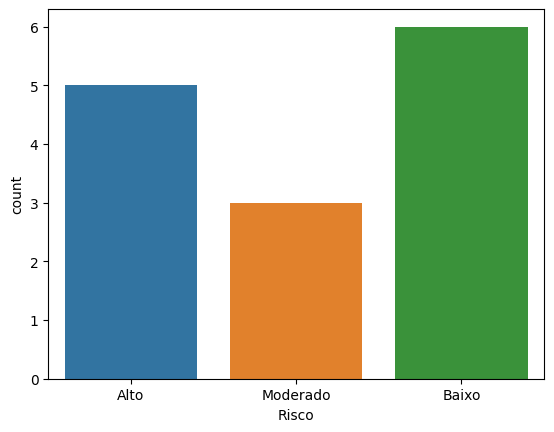

In [10]:
sns.countplot(x = base['Risco']);

**Separando os atributos de entrada e de classe**

In [11]:
X_prev = base.iloc[:, 0:5].values

In [12]:
X_prev

array([['Ruim', 'Alta', 'Nenhuma', '<15mil', 'Alto'],
       ['Desconhecida', 'Alta', 'Nenhuma', '>15mil<35mil', 'Alto'],
       ['Desconhecida', 'Baixa', 'Nenhuma', '>15mil<35mil', 'Moderado'],
       ['Desconhecida', 'Baixa', 'Nenhuma', '>35mil', 'Baixo'],
       ['Desconhecida', 'Baixa', 'Nenhuma', '>35mil', 'Baixo'],
       ['Desconhecida', 'Baixa', 'Adequada', '>35mil', 'Baixo'],
       ['Ruim', 'Baixa', 'Nenhuma', '<15mil', 'Alto'],
       ['Ruim', 'Baixa', 'Adequada', '>35mil', 'Moderado'],
       ['Boa', 'Baixa', 'Nenhuma', '>35mil', 'Baixo'],
       ['Boa', 'Alta', 'Adequada', '>35mil', 'Baixo'],
       ['Boa', 'Alta', 'Nenhuma', '<15mil', 'Alto'],
       ['Boa', 'Alta', 'Nenhuma', '>15mil<35mil', 'Moderado'],
       ['Boa', 'Alta', 'Nenhuma', '>35mil', 'Baixo'],
       ['Ruim', 'Alta', 'Nenhuma', '>15mil<35mil', 'Alto']], dtype=object)

In [13]:
X_prev_label = base.iloc[:, 0:5]

In [14]:
X_prev_label

,Historia,Divida,Garantias,RendaAnual,Risco
0,Ruim,Alta,Nenhuma,<15mil,Alto
1,Desconhecida,Alta,Nenhuma,>15mil<35mil,Alto
2,Desconhecida,Baixa,Nenhuma,>15mil<35mil,Moderado
3,Desconhecida,Baixa,Nenhuma,>35mil,Baixo
4,Desconhecida,Baixa,Nenhuma,>35mil,Baixo
5,Desconhecida,Baixa,Adequada,>35mil,Baixo
6,Ruim,Baixa,Nenhuma,<15mil,Alto
7,Ruim,Baixa,Adequada,>35mil,Moderado
8,Boa,Baixa,Nenhuma,>35mil,Baixo
9,Boa,Alta,Adequada,>35mil,Baixo


In [15]:
X_prev[:,4]

array(['Alto', 'Alto', 'Moderado', 'Baixo', 'Baixo', 'Baixo', 'Alto',
       'Moderado', 'Baixo', 'Baixo', 'Alto', 'Moderado', 'Baixo', 'Alto'],
      dtype=object)

In [16]:
y_classe = base.iloc[:, 4].values

In [17]:
y_classe

array(['Alto', 'Alto', 'Moderado', 'Baixo', 'Baixo', 'Baixo', 'Alto',
       'Moderado', 'Baixo', 'Baixo', 'Alto', 'Moderado', 'Baixo', 'Alto'],
      dtype=object)

**Podemos fazer esta mesma divisão (separar as variáveis de entrada e saída) usando os comandos abaixo**

In [18]:
#X = base.copy()
#y = X.pop('Conclusao')

**Tratamento de dados categóricos**

> *LabelEncoder - Vamos tratar os dados categóricos colocando 1, 2, 3 e etc**



In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
label_encoder = LabelEncoder()

In [21]:
X_prev[:,0]

array(['Ruim', 'Desconhecida', 'Desconhecida', 'Desconhecida',
       'Desconhecida', 'Desconhecida', 'Ruim', 'Ruim', 'Boa', 'Boa',
       'Boa', 'Boa', 'Boa', 'Ruim'], dtype=object)

In [22]:
X_prev

array([['Ruim', 'Alta', 'Nenhuma', '<15mil', 'Alto'],
       ['Desconhecida', 'Alta', 'Nenhuma', '>15mil<35mil', 'Alto'],
       ['Desconhecida', 'Baixa', 'Nenhuma', '>15mil<35mil', 'Moderado'],
       ['Desconhecida', 'Baixa', 'Nenhuma', '>35mil', 'Baixo'],
       ['Desconhecida', 'Baixa', 'Nenhuma', '>35mil', 'Baixo'],
       ['Desconhecida', 'Baixa', 'Adequada', '>35mil', 'Baixo'],
       ['Ruim', 'Baixa', 'Nenhuma', '<15mil', 'Alto'],
       ['Ruim', 'Baixa', 'Adequada', '>35mil', 'Moderado'],
       ['Boa', 'Baixa', 'Nenhuma', '>35mil', 'Baixo'],
       ['Boa', 'Alta', 'Adequada', '>35mil', 'Baixo'],
       ['Boa', 'Alta', 'Nenhuma', '<15mil', 'Alto'],
       ['Boa', 'Alta', 'Nenhuma', '>15mil<35mil', 'Moderado'],
       ['Boa', 'Alta', 'Nenhuma', '>35mil', 'Baixo'],
       ['Ruim', 'Alta', 'Nenhuma', '>15mil<35mil', 'Alto']], dtype=object)

In [23]:
label_encoder_Historia = LabelEncoder()
label_encoder_Divida = LabelEncoder()
label_encoder_Garantias = LabelEncoder()
label_encoder_RendaAnual = LabelEncoder()
label_encoder_Risco= LabelEncoder()


In [24]:
X_prev[:,0] = label_encoder_Historia.fit_transform(X_prev[:,0])
X_prev[:,1] = label_encoder_Divida.fit_transform(X_prev[:,1])
X_prev[:,2] = label_encoder_Garantias.fit_transform(X_prev[:,2])
X_prev[:,3] = label_encoder_RendaAnual.fit_transform(X_prev[:,3])
X_prev[:,4] = label_encoder_Risco.fit_transform(X_prev[:,4])


In [25]:
X_prev

array([[2, 0, 1, 0, 0],
       [1, 0, 1, 1, 0],
       [1, 1, 1, 1, 2],
       [1, 1, 1, 2, 1],
       [1, 1, 1, 2, 1],
       [1, 1, 0, 2, 1],
       [2, 1, 1, 0, 0],
       [2, 1, 0, 2, 2],
       [0, 1, 1, 2, 1],
       [0, 0, 0, 2, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 1, 2],
       [0, 0, 1, 2, 1],
       [2, 0, 1, 1, 0]], dtype=object)



> OneHotEncoder - Agora vamos binarizar atributos não ordinais

**Contando quantas opções de resposta tem cada atributo**

In [26]:
len(np.unique(base['Risco']))

3

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [28]:
X_prev

array([[2, 0, 1, 0, 0],
       [1, 0, 1, 1, 0],
       [1, 1, 1, 1, 2],
       [1, 1, 1, 2, 1],
       [1, 1, 1, 2, 1],
       [1, 1, 0, 2, 1],
       [2, 1, 1, 0, 0],
       [2, 1, 0, 2, 2],
       [0, 1, 1, 2, 1],
       [0, 0, 0, 2, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 1, 2],
       [0, 0, 1, 2, 1],
       [2, 0, 1, 1, 0]], dtype=object)

In [29]:
X_prev[:,0:5]

array([[2, 0, 1, 0, 0],
       [1, 0, 1, 1, 0],
       [1, 1, 1, 1, 2],
       [1, 1, 1, 2, 1],
       [1, 1, 1, 2, 1],
       [1, 1, 0, 2, 1],
       [2, 1, 1, 0, 0],
       [2, 1, 0, 2, 2],
       [0, 1, 1, 2, 1],
       [0, 0, 0, 2, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 1, 2],
       [0, 0, 1, 2, 1],
       [2, 0, 1, 1, 0]], dtype=object)

In [30]:
onehotencoder_restaurante = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1])], remainder='passthrough')


In [31]:
X_prev= onehotencoder_restaurante.fit_transform(X_prev)

In [32]:
X_prev

array([[1.0, 0.0, 2, 1, 0, 0],
       [1.0, 0.0, 1, 1, 1, 0],
       [0.0, 1.0, 1, 1, 1, 2],
       [0.0, 1.0, 1, 1, 2, 1],
       [0.0, 1.0, 1, 1, 2, 1],
       [0.0, 1.0, 1, 0, 2, 1],
       [0.0, 1.0, 2, 1, 0, 0],
       [0.0, 1.0, 2, 0, 2, 2],
       [0.0, 1.0, 0, 1, 2, 1],
       [1.0, 0.0, 0, 0, 2, 1],
       [1.0, 0.0, 0, 1, 0, 0],
       [1.0, 0.0, 0, 1, 1, 2],
       [1.0, 0.0, 0, 1, 2, 1],
       [1.0, 0.0, 2, 1, 1, 0]], dtype=object)

In [33]:
X_prev.shape

(14, 6)

**Esta mesma transformação OneHotEncoder pode ser feita com o comando abaixo**

In [34]:
#base = pd.get_dummies(X_prev_label)
#base.head()

**Método de amostragem Holdout**

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_prev

array([[1.0, 0.0, 2, 1, 0, 0],
       [1.0, 0.0, 1, 1, 1, 0],
       [0.0, 1.0, 1, 1, 1, 2],
       [0.0, 1.0, 1, 1, 2, 1],
       [0.0, 1.0, 1, 1, 2, 1],
       [0.0, 1.0, 1, 0, 2, 1],
       [0.0, 1.0, 2, 1, 0, 0],
       [0.0, 1.0, 2, 0, 2, 2],
       [0.0, 1.0, 0, 1, 2, 1],
       [1.0, 0.0, 0, 0, 2, 1],
       [1.0, 0.0, 0, 1, 0, 0],
       [1.0, 0.0, 0, 1, 1, 2],
       [1.0, 0.0, 0, 1, 2, 1],
       [1.0, 0.0, 2, 1, 1, 0]], dtype=object)

In [37]:
y_classe

array([0, 0, 2, 1, 1, 1, 0, 2, 1, 1, 0, 2, 1, 0], dtype=object)

In [38]:
y_classe.shape

(14,)

In [39]:
#X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split(X, y, test_size=0.3, random_state=123, shuffle=True, stratify=y)
X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size = 0.20, random_state = 1)

In [40]:
X_treino.shape

(11, 6)

In [41]:
X_teste.shape

(3, 6)

In [42]:
print(X_treino)
print(y_treino)

[[0.0 1.0 1 1 1 2]
 [1.0 0.0 0 1 0 0]
 [0.0 1.0 1 1 2 1]
 [1.0 0.0 1 1 1 0]
 [1.0 0.0 0 1 2 1]
 [1.0 0.0 2 1 0 0]
 [1.0 0.0 2 1 1 0]
 [1.0 0.0 0 0 2 1]
 [0.0 1.0 0 1 2 1]
 [1.0 0.0 0 1 1 2]
 [0.0 1.0 1 0 2 1]]
[2 0 1 0 1 0 0 1 1 2 1]


**Vamos experimentar agora o algoritmo Decision Tree?**

In [43]:
from sklearn.preprocessing import LabelEncoder
label_encoder_teste = LabelEncoder()
y_treino_encoded = label_encoder_teste.fit_transform(y_treino)

In [44]:
modelo = DecisionTreeClassifier(criterion='entropy')


In [45]:
Y = modelo.fit(X_treino, y_treino_encoded)

**Vamos testar o modelo?**

In [46]:
previsoes = modelo.predict(X_teste)

**Será se o modelo acertou?**

In [47]:
y_teste

array([1, 2, 0], dtype=object)

In [48]:
# Inicialize o LabelEncoder
label_encoder = LabelEncoder()

# Ajuste o encoder aos rótulos de treinamento
label_encoder.fit(y_treino)

LabelEncoder()

In [49]:
y_teste_encoded = label_encoder.transform(y_teste)


In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste_encoded,previsoes)

0.6666666666666666

In [51]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste_encoded, previsoes)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 1, 0]], dtype=int64)

0.6666666666666666

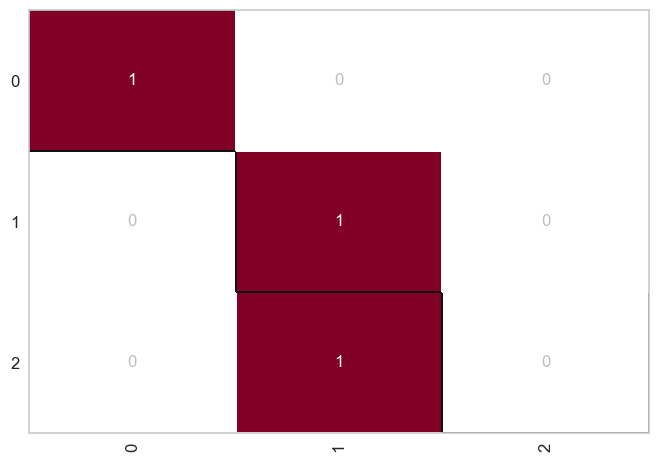

In [52]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino_encoded)
cm.score(X_teste, y_teste_encoded)

In [53]:
print(classification_report(y_teste_encoded, previsoes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.50      1.00      0.67         1
           2       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.50      0.67      0.56         3
weighted avg       0.50      0.67      0.56         3



C:\Users\lmoxa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lmoxa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lmoxa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469

**Vamos ver a árvore?**

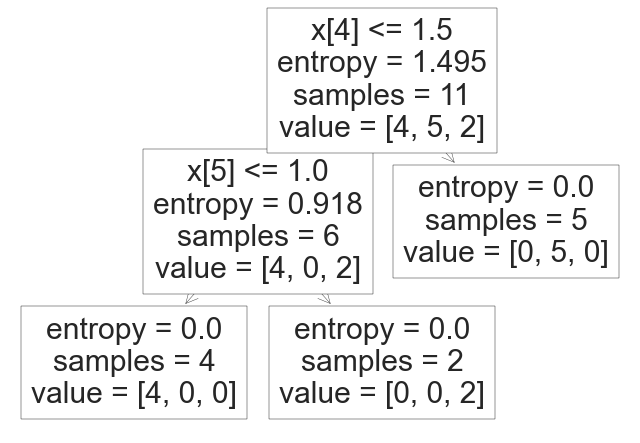

In [54]:
from sklearn import tree
plt.show(tree.plot_tree(Y))